In [1]:
%pylab inline
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')

Populating the interactive namespace from numpy and matplotlib


In [2]:
import numpy as np 
import pandas as pd 
import seaborn as sb

# Multivariate Analysis 

**Source signal**: $Z'$ vector boson. $M_Z'$  = __1250 $GeV$__

In [3]:
# Set folder configuration 
folder_random = 'randomSampleCuts/'
folder_full = 'fullSampleCuts/'
signal_filename = 'signal_1p25TeV.root'

In [4]:
# Import random sample from ROOT
signal = pd.read_csv(folder_random+'joined_'+signal_filename+'.csv')
signal.head()

,type,Tau_PT_sum,Tau_PT_dif,Tau_PT_1,Tau_PT_2,Tau_Mass_sum,Tau_Mass_dif,Tau_Mass_1,Tau_Mass_2,Tau_Ener_sum,...,Jet_Mass_2,Jet_Ener_sum,Jet_Ener_1,Jet_Ener_2,Jet_Eta_dif,Jet_Eta_1,Jet_Eta_2,Jet_Phi_dif,Jet_Phi_1,Jet_Phi_2
0,1,1069.780,896.0020,982.8890,86.8873,36.12510,29.80750,32.96630,3.158810,1337.580,...,23.89780,2298.68,1786.810,511.878,-3.96755,-2.255030,1.71253,-2.16425,-3.086440,-0.922195
1,1,560.291,196.2800,378.2860,182.0050,6.80824,-4.29741,1.25541,5.552820,608.319,...,7.82506,1477.50,708.794,768.701,4.12328,0.940609,-3.18267,2.88392,2.593620,-0.290301
2,1,209.794,115.3760,162.5850,47.2091,3.67341,1.68212,2.67776,0.995643,518.502,...,6.25223,1460.60,782.249,678.349,3.88728,1.683030,-2.20425,-0.78514,-0.058465,0.726675
3,1,115.137,40.9251,78.0310,37.1059,4.09243,0.01025,2.05134,2.041090,419.881,...,33.19180,1645.67,647.587,998.082,3.72943,1.373740,-2.35569,-2.74532,-1.515330,1.229980
4,1,107.220,30.8602,69.0401,38.1800,11.31040,6.73619,9.02330,2.287110,883.174,...,5.70995,2257.79,387.411,1870.380,4.02811,1.054560,-2.97355,-0.56306,2.465370,3.028430


Let's see some descriptive statistics from raw data 

In [5]:
signal.describe()

,type,Tau_PT_sum,Tau_PT_dif,Tau_PT_1,Tau_PT_2,Tau_Mass_sum,Tau_Mass_dif,Tau_Mass_1,Tau_Mass_2,Tau_Ener_sum,...,Jet_Mass_2,Jet_Ener_sum,Jet_Ener_1,Jet_Ener_2,Jet_Eta_dif,Jet_Eta_1,Jet_Eta_2,Jet_Phi_dif,Jet_Phi_1,Jet_Phi_2
count,807.000000,807.000000,807.000000,807.000000,807.000000,807.000000,807.000000,807.000000,807.000000,807.000000,...,8.070000e+02,807.000000,807.000000,807.000000,807.000000,807.000000,807.000000,807.000000,807.000000,807.000000
mean,0.333333,223.840206,105.715716,164.777953,59.062234,10.675502,4.595484,7.635494,3.040009,402.463708,...,9.526029e+00,863.346643,464.922038,398.424493,0.066233,0.043253,-0.022980,-0.017044,0.055045,0.072089
std,0.471697,180.029943,99.122999,128.121643,68.577712,9.371340,9.348769,8.702546,3.446226,317.504183,...,8.585424e+00,793.584866,439.968222,546.730343,3.142541,1.385916,2.033414,2.576162,1.833394,1.805774
min,0.000000,70.699800,0.132858,60.065400,7.577520,-0.000004,-20.075900,-0.000009,-0.000015,74.825100,...,1.192090e-07,67.578800,53.302900,8.780340,-4.985470,-3.632670,-4.410800,-5.938020,-3.132170,-3.139800
25%,0.000000,107.947000,45.996500,77.618850,20.168800,4.419810,-0.600606,2.027395,1.052750,178.137000,...,3.611015e+00,249.237000,159.658500,45.913400,-2.968970,-1.048120,-1.735375,-1.959440,-1.536805,-1.475240
50%,0.000000,152.576000,73.313400,115.187000,37.105900,7.943510,2.265680,4.819890,2.035380,314.282000,...,7.140020e+00,500.163000,303.227000,126.132000,0.293653,0.016611,-0.007582,-0.009665,0.061436,0.216530
75%,1.000000,265.543000,131.078000,194.906000,69.175700,14.234000,8.569615,10.514150,3.569545,503.379000,...,1.258590e+01,1396.965000,626.882500,554.508000,3.165460,1.128995,1.567490,1.754185,1.641565,1.529940
max,1.000000,1621.900000,896.002000,982.889000,730.112000,82.348400,67.791800,75.070100,23.225700,2215.190000,...,8.615520e+01,3409.670000,2595.880000,2742.930000,4.970300,3.522210,4.654080,6.110060,3.135360,3.134690


In [6]:
# Which variables we have
signal.columns

Index([u'type', u'Tau_PT_sum', u'Tau_PT_dif', u'Tau_PT_1', u'Tau_PT_2',
       u'Tau_Mass_sum', u'Tau_Mass_dif', u'Tau_Mass_1', u'Tau_Mass_2',
       u'Tau_Ener_sum', u'Tau_Ener_1', u'Tau_Ener_2', u'Tau_Eta_dif',
       u'Tau_Eta_1', u'Tau_Eta_2', u'Tau_Phi_dif', u'Tau_Phi_1', u'Tau_Phi_2',
       u'Miss_MET', u'Jet_PT_sum', u'Jet_PT_dif', u'Jet_PT_1', u'Jet_PT_2',
       u'Jet_Mass_sum', u'Jet_Mass_dif', u'Jet_Mass_1', u'Jet_Mass_2',
       u'Jet_Ener_sum', u'Jet_Ener_1', u'Jet_Ener_2', u'Jet_Eta_dif',
       u'Jet_Eta_1', u'Jet_Eta_2', u'Jet_Phi_dif', u'Jet_Phi_1', u'Jet_Phi_2'],
      dtype='object')

As a first approach to new data, it's useful to see how their variables are distributed. Futhermore, as a *supervised learning problem*, we know the target varaible, so lets use it:

*These graphs were generated with ROOT*

In [7]:
from IPython.display import IFrame
IFrame('./'+folder_random+'histograms_'+signal_filename+'ByType_1.pdf',width=850,height=560)

In [8]:
IFrame('./'+folder_random+'histograms_'+signal_filename+'ByType_2.pdf',width=850,height=560)

In [9]:
IFrame('./'+folder_random+'histograms_'+signal_filename+'ByType_3.pdf',width=850,height=560)

From the previous images, we can see that some variables could have higher predictable power to discriminate between **signal** and **background** if we take the absolute value of them:
     
    - Tau_Mass_dif, Jet_Mass_dif
    - Jet_PT_dif, Tau_PT_dif
    - Jet_Eta_dif, Jet_Eta_1, Jet_Eta_1
    - Tau_Eta_dif, Tau_Eta_1, Tau_Eta_2    
    - Tau_Phi_dif, Tau_Phi_1, Tau_Phi_2
    - Jet_Phi_dif, Jet_Phi_1, Jet_Phi_2

However, some of them (and others) seems don't have enough classification power:
   
    - Jet_PT_dif, Tau_PT_dif  
    - Tau_Mass_dif, Jet_Mass_dif
    - Tau_Eta_dif, Tau_Eta_1, Tau_Eta_2
    - Tau_Phi_dif, Tau_Phi_1, Tau_Phi_2
    - Miss_Eta, Miss_Phi
    - Jet_Phi_dif, Jet_Phi_1, Jet_Phi_2
    
For now, let's take the absolute value:

In [10]:
signal[['Tau_Mass_dif','Jet_Mass_dif']] = signal[['Tau_Mass_dif','Jet_Mass_dif']].abs()
signal[['Jet_PT_dif','Tau_PT_dif']] = signal[['Jet_PT_dif','Tau_PT_dif']].abs()
signal[['Jet_Eta_dif','Jet_Eta_1','Jet_Eta_1']] = signal[['Jet_Eta_dif','Jet_Eta_1','Jet_Eta_1']].abs()
signal[['Tau_Eta_dif','Tau_Eta_1','Tau_Eta_2']] = signal[['Tau_Eta_dif','Tau_Eta_1','Tau_Eta_2']].abs()
signal[['Tau_Phi_dif','Tau_Phi_1','Tau_Phi_2']] = signal[['Tau_Phi_dif','Tau_Phi_1','Tau_Phi_2']].abs()
signal[['Jet_Phi_dif','Jet_Phi_1','Jet_Phi_2']] = signal[['Jet_Phi_dif','Jet_Phi_1','Jet_Phi_2']].abs()
signal[['Jet_Mass_sum']] = signal[['Jet_Mass_sum']].abs()

In [11]:
# Divide the data between dependent and independent variables
Xsignal = signal.drop(['type'],axis=1)
Ysignal = signal['type']

# Exploraty Analysis

### Pre-Pre-Processing 

The objective of the following sections is to explorate our data and find useful insigths that could gives us a flavor of the sense of the data. As the previous graphs shows, there are some variables that possiblely would not have importance in the prediction of the target variable - **type** of event = (**Signal**, **Background**) -, so the posterior analysis should confirm this of them. 

This process called *feature selection* is fundamental for the success of the model implementation. However, to avoid bias of *feature selection* we must divide the data in two parts: trainning-test set and validation set. To read more about the bias on *feature selection* see: http://www.pnas.org/content/99/10/6562.full.pdf


In [12]:
from sklearn.cross_validation import train_test_split
X_train_test, X_validation, Y_train_test, Y_validation = train_test_split(Xsignal,Ysignal,test_size=.2)
train_test = pd.concat([Y_train_test,X_train_test],axis=1)
X_validation.describe()

/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


,Tau_PT_sum,Tau_PT_dif,Tau_PT_1,Tau_PT_2,Tau_Mass_sum,Tau_Mass_dif,Tau_Mass_1,Tau_Mass_2,Tau_Ener_sum,Tau_Ener_1,...,Jet_Mass_2,Jet_Ener_sum,Jet_Ener_1,Jet_Ener_2,Jet_Eta_dif,Jet_Eta_1,Jet_Eta_2,Jet_Phi_dif,Jet_Phi_1,Jet_Phi_2
count,162.000000,162.000000,162.000000,162.000000,1.620000e+02,1.620000e+02,162.000000,162.000000,162.000000,162.000000,...,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000
mean,226.878191,110.261223,168.569693,58.308470,9.941349e+00,6.186399e+00,7.095512,2.845837,405.942512,293.046174,...,8.746938,897.360051,504.606302,392.753490,3.023038,1.242311,0.014366,2.016658,1.546507,1.475279
std,173.809861,100.131353,123.878099,69.081655,7.077930e+00,6.655145e+00,6.948462,3.013562,324.203178,229.977301,...,6.452703,765.248915,486.635368,496.601899,1.112470,0.768793,2.060072,1.519955,0.914958,0.937637
min,72.860400,5.390080,60.347900,9.009540,-1.685870e-07,1.685870e-07,-0.000009,-0.000004,85.566700,61.639900,...,0.656633,87.857500,53.302900,10.903400,0.508450,0.000677,-3.774760,0.001482,0.005301,0.007956
25%,113.479750,48.400875,81.729725,19.109850,4.838337e+00,1.507280e+00,2.291952,1.037190,173.523000,120.623750,...,3.773290,282.313250,183.880250,44.772125,2.234633,0.709068,-1.730748,0.660036,0.753016,0.673179
50%,156.145500,77.467200,122.547000,36.170050,8.222225e+00,3.694175e+00,4.455545,2.041090,327.822500,242.320500,...,7.105270,583.297000,361.157500,151.510000,3.139435,1.134670,-0.141380,1.763355,1.531720,1.289885
75%,268.430500,133.026250,204.981750,66.247550,1.338600e+01,9.380345e+00,9.914635,3.555220,510.747000,370.767500,...,11.872600,1483.262500,635.502500,650.210000,3.881100,1.776480,1.780857,3.152512,2.364298,2.273503
max,1194.830000,565.701000,673.776000,521.050000,3.893580e+01,3.680840e+01,37.872100,21.295000,1914.930000,1165.920000,...,33.191800,3034.680000,2595.880000,1999.680000,4.955210,3.221410,4.654080,6.110060,3.047520,3.134690


This set will be usufull at the end of the model implementation to check for bias selection.



### Correlation Matrix


In order to look for the most important variables to classify each event between __signal__ and __Background__ we can calculate the matrix of correlations of the whole data set. We expect that higher correlations could have higher predictable power. As a side effect of this tool we can look for the presence of *multicolinearity* in the data.

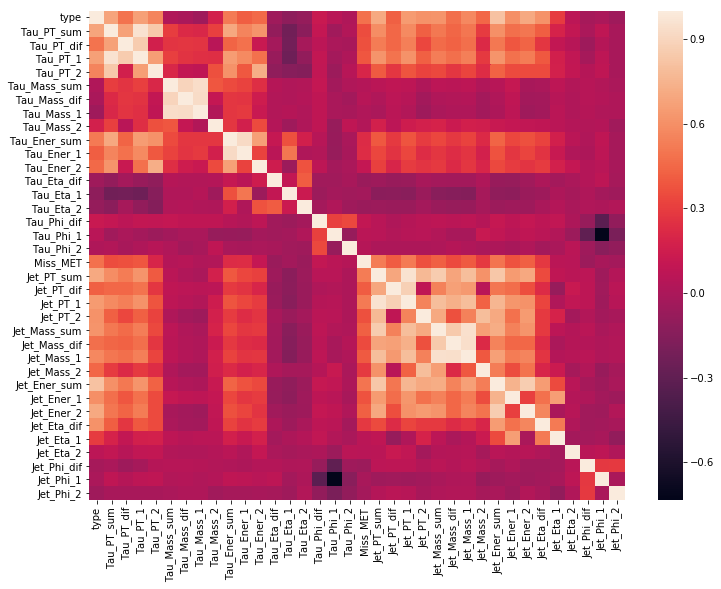

In [13]:
corrmat = train_test.corr()
f,ax =  plt.subplots(figsize=(12,9))
sb.heatmap(corrmat);

From the previous **heatmap**, first we can see that **Tau_Eta/Phi_1/2/dif** variables almost don't have any correlation with the other variables. 
Second, according to the *Vector Boson Fusion* Topology the **Jet_Eta_1/2/dif** variables should have great discrimination power, i.e. high correlation with type. However, it seems that these aren't the best ones at this stage (**Note: Jet_Eta_dif/1/2** have a great importance in the background clearing step, previous to this analysis). In contrast, other variables related with **Tranverse Momentum** could have better fit. 

Finally, as a result of the merging information process, there are a lot of group of variables that are highly correlated between them, e.g. **Jet_PT_sum/dif/1/2**, because they represent the same physical observable. 

Let's look more in deeper to check which are the most important features (high correlation with **type**).

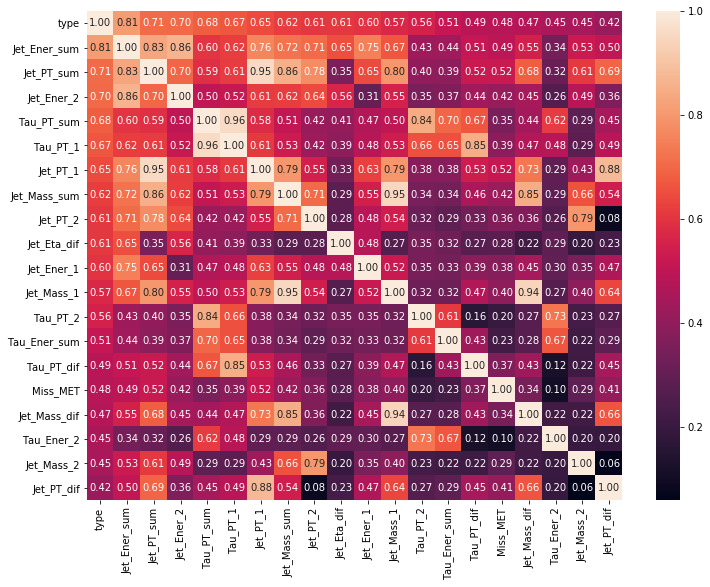

In [14]:
# Correlation matrix ordered by correlation with type

k = 20
f,ax =  plt.subplots(figsize=(12,9))
cols = corrmat.nlargest(k, 'type')['type'].index
cm = np.corrcoef(train_test[cols].values.T)
heatmap = sb.heatmap(cm,annot=True,fmt='.2f',yticklabels=cols.values,xticklabels=cols.values)

According to the previous ranking and avoiding *multicolinearity*, in each group of variables we can select the one with highest correlation with **type**:
    1. Jet_Ener_sum
    2. Jet_PT_sum
    3. Tau_PT_sum
    4. Jet_Mass_sum
    5. Miss_MET
    6. Tau_Ener_sum
    7. Jet_Eta_dif

In [15]:
X_train_test_selected = train_test[['Jet_Ener_sum','Jet_PT_sum','Tau_PT_sum','Jet_Mass_sum','Miss_MET','Tau_Ener_sum','Jet_Eta_dif']]
Y_train_test_selected = train_test['type']
train_test_selected = pd.concat([Y_train_test_selected,X_train_test_selected],axis=1)
train_test_selected.describe()

,type,Jet_Ener_sum,Jet_PT_sum,Tau_PT_sum,Jet_Mass_sum,Miss_MET,Tau_Ener_sum,Jet_Eta_dif
count,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000
mean,0.331783,854.803740,274.682033,223.077177,34.967028,98.563427,401.589961,2.833980
std,0.471219,800.895433,191.323628,181.682225,27.042732,88.322081,316.048943,1.308852
min,0.000000,67.578800,61.455100,70.699800,5.602700,30.019900,74.825100,0.131396
25%,0.000000,237.392000,131.440000,106.012000,16.032200,44.377500,179.989000,1.680670
50%,0.000000,474.218000,204.222000,152.341000,24.899600,69.520600,305.687000,3.025220
75%,1.000000,1374.780000,365.237000,262.661000,44.529700,117.850000,500.385000,3.934370
max,1.000000,3409.670000,1066.760000,1621.900000,153.864000,1252.410000,2215.190000,4.985470


### Separabilty of Data

To get a better approach to the data and how it is compound, it's possible to make a scatter plot across all variables. The idea is to know how would be the best function that can divide the data between **signal** and **background** events.

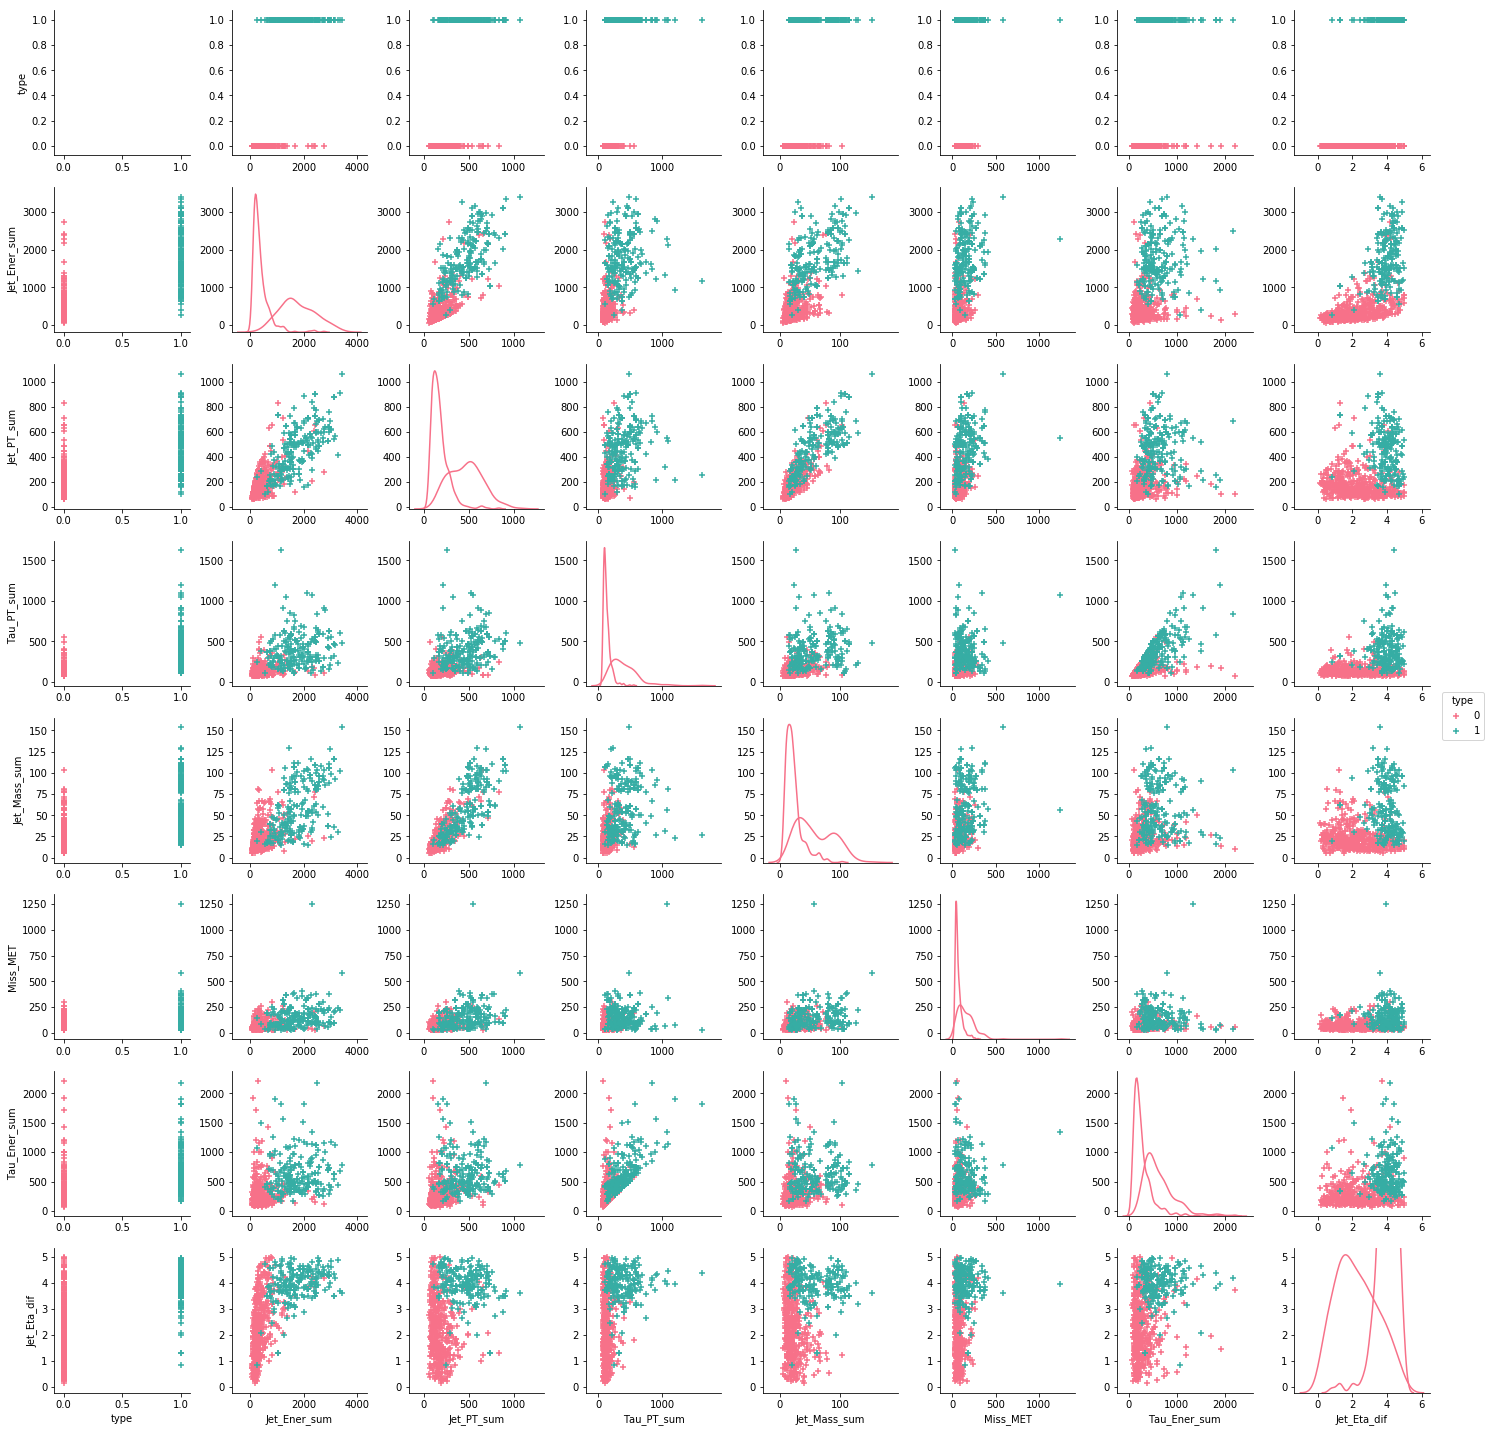

In [16]:
sb.pairplot(train_test_selected,hue='type',diag_kind='kde',palette='husl', markers='+');

The above graph shows that in some pair of variables it doesn't exist a linear function that can easily divide the data. Futhermore, as it's shown in the *Kernel distributions* plots over the diagonal, the background data is highly concentrated in some ranges. So to smoothe the variance of the data set over *type* of event, let's *log-transformated* the data (independent variables) in other to get a more comparable data by **type**.

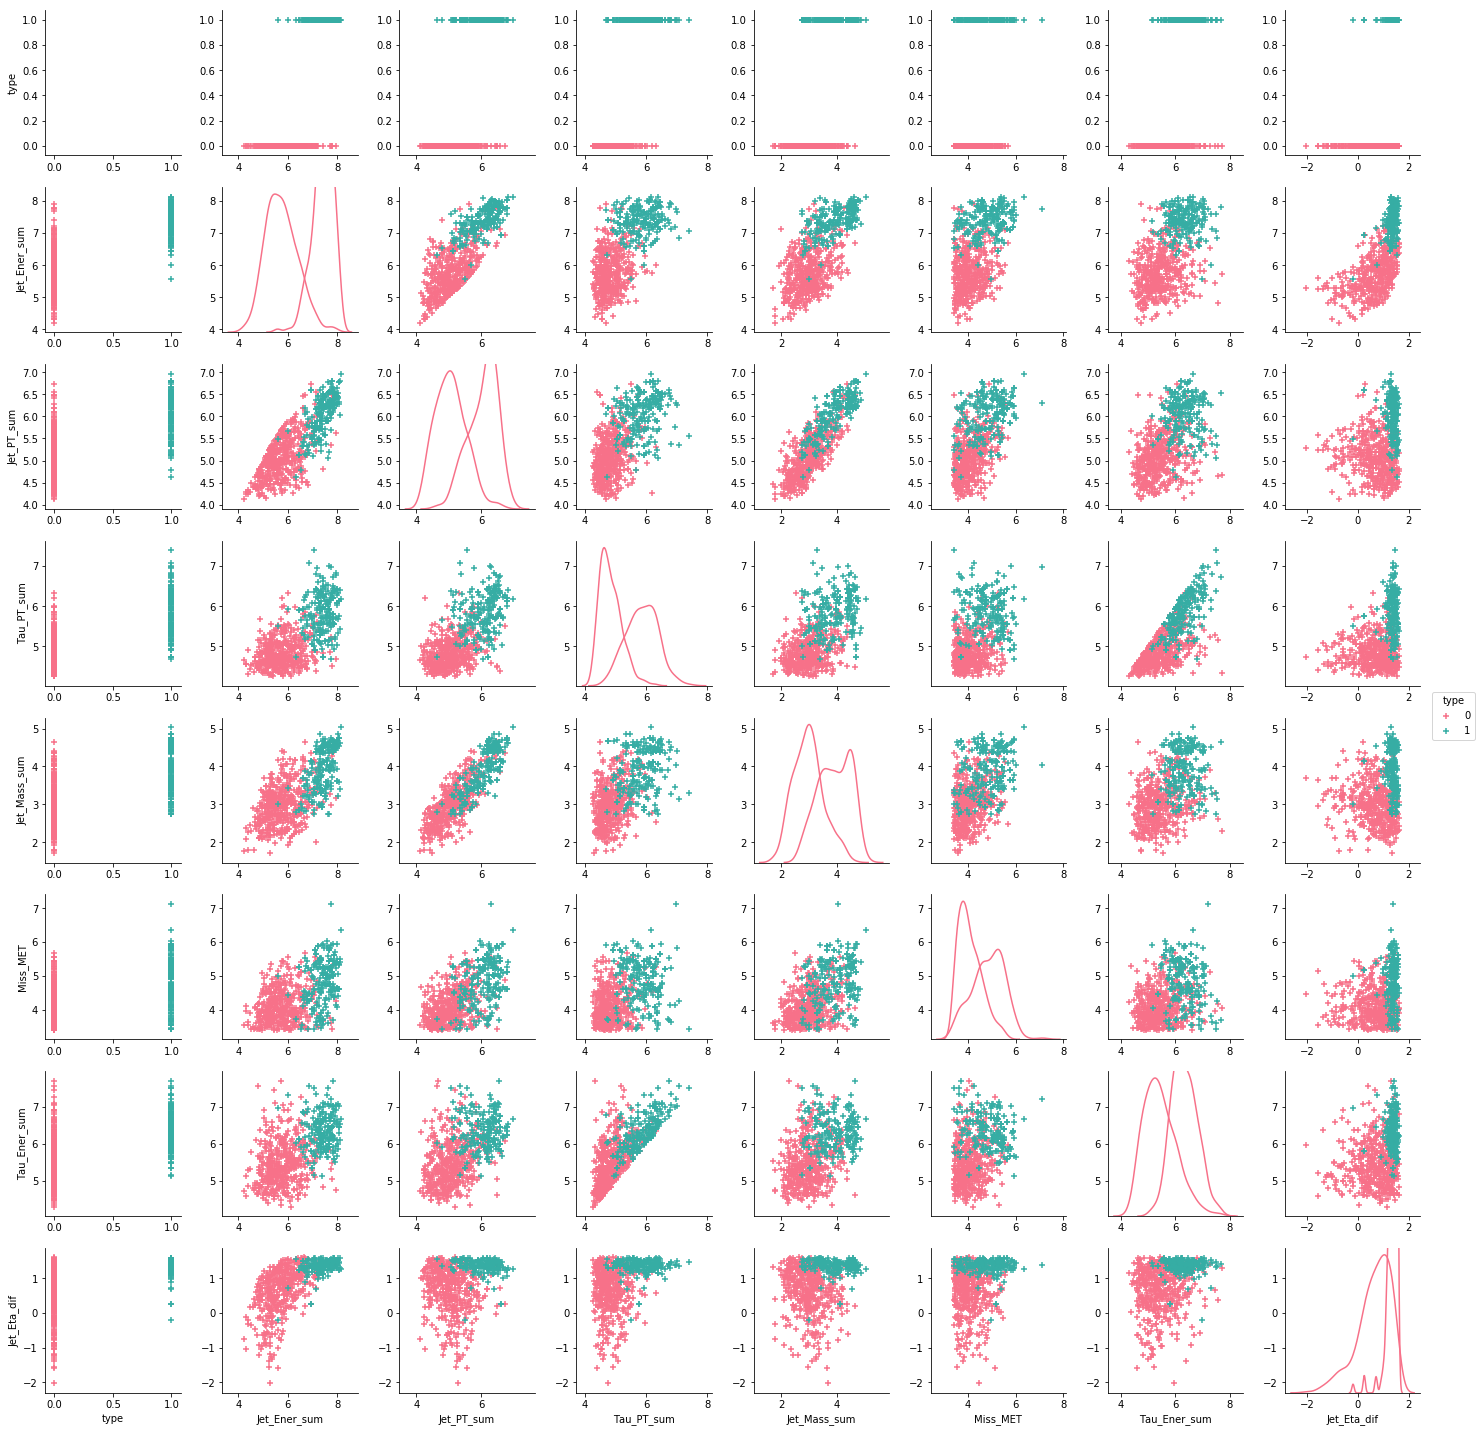

In [17]:
sb.pairplot(pd.concat([Y_train_test_selected,log(X_train_test_selected)],axis=1),hue='type',diag_kind='kde',palette='husl',markers='+');

In this approach we can see a more clear separation than the previous figure, even it's possible to think that it would exist a linear function that can divide the data between **signal** and **background**

To confirm how have changed the data, let's see the empirical distributions before and after transformation.

In [18]:
def makeJoinHist(dataframe,varname):  
    leg =['1','0']
    fig, ax = plt.subplots()
    sb.distplot(dataframe[dataframe['type']==1][varname], ax = ax, label=r"$Z'\rightarrow \tau \tau$",color='b')
    sb.distplot(dataframe[dataframe['type']==0][varname], ax = ax, label='SM Background',color='r')
    fig.legend()

Text(0.5,1,u'Log-transformation')

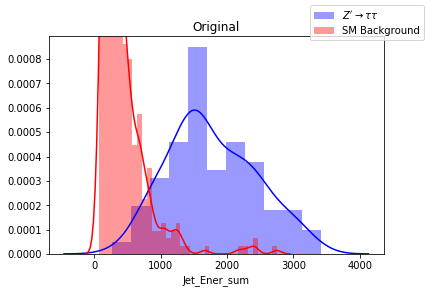

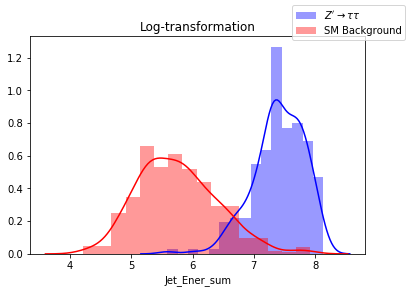

In [19]:
makeJoinHist(train_test_selected,'Jet_Ener_sum')
plt.title("Original")
makeJoinHist(pd.concat([Y_train_test_selected,log(X_train_test_selected)],axis=1),'Jet_Ener_sum')
plt.title("Log-transformation")

Text(0.5,1,u'Log-transformation')

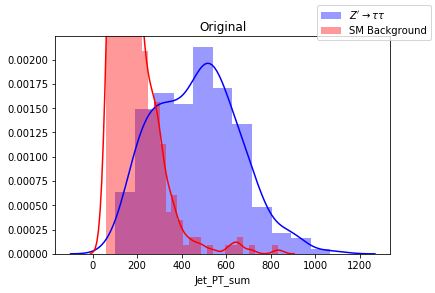

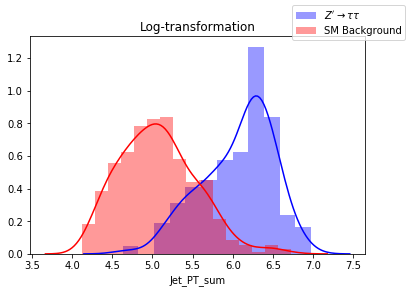

In [20]:
makeJoinHist(train_test_selected,'Jet_PT_sum')
plt.title("Original")
makeJoinHist(pd.concat([Y_train_test_selected,log(X_train_test_selected)],axis=1),'Jet_PT_sum')
plt.title("Log-transformation")

Text(0.5,1,u'Log-transformation')

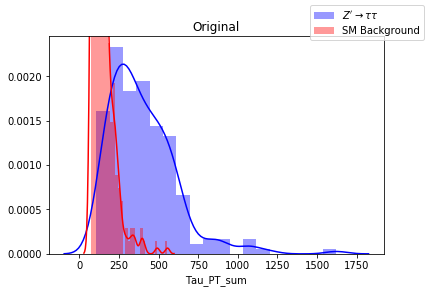

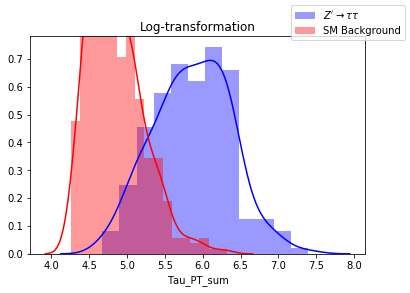

In [21]:
makeJoinHist(train_test_selected,'Tau_PT_sum')
plt.title("Original")
makeJoinHist(pd.concat([Y_train_test_selected,log(X_train_test_selected)],axis=1),'Tau_PT_sum')
plt.title("Log-transformation")

Text(0.5,1,u'Log-transformation')

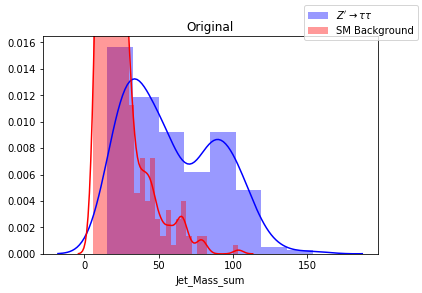

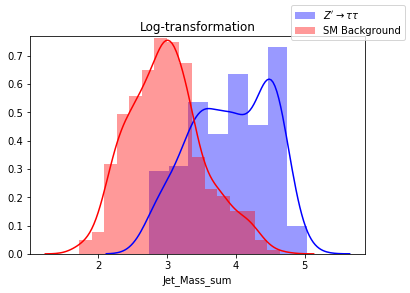

In [22]:
makeJoinHist(train_test_selected,'Jet_Mass_sum')
plt.title("Original")
makeJoinHist(pd.concat([Y_train_test_selected,log(X_train_test_selected)],axis=1),'Jet_Mass_sum')
plt.title("Log-transformation")

Text(0.5,1,u'Log-transformation')

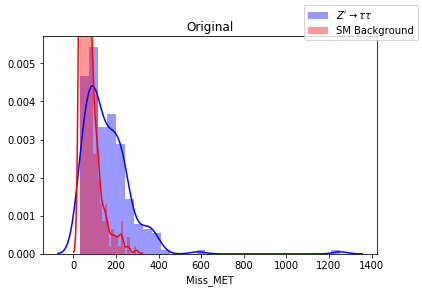

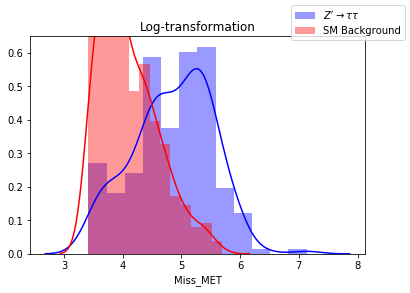

In [23]:
makeJoinHist(train_test_selected,'Miss_MET')
plt.title("Original")
makeJoinHist(pd.concat([Y_train_test_selected,log(X_train_test_selected)],axis=1),'Miss_MET')
plt.title("Log-transformation")

Text(0.5,1,u'Log-transformation')

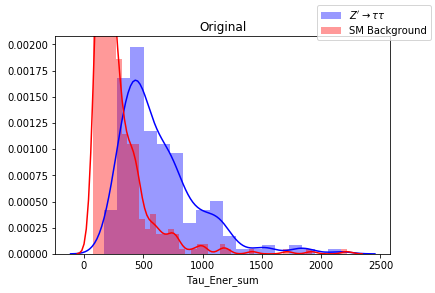

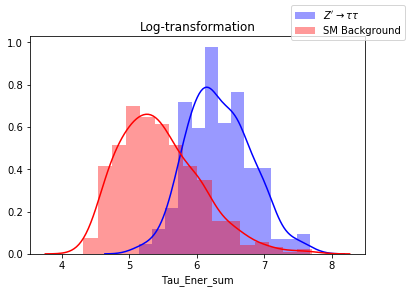

In [24]:
makeJoinHist(train_test_selected,'Tau_Ener_sum')
plt.title("Original")
makeJoinHist(pd.concat([Y_train_test_selected,log(X_train_test_selected)],axis=1),'Tau_Ener_sum')
plt.title("Log-transformation")

Text(0.5,1,u'Log-transformation')

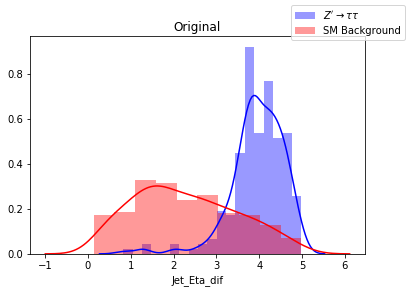

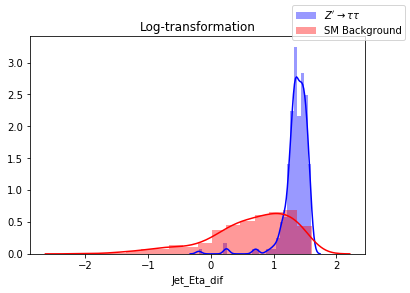

In [25]:
makeJoinHist(train_test_selected,'Jet_Eta_dif')
plt.title("Original")
makeJoinHist(pd.concat([Y_train_test_selected,log(X_train_test_selected)],axis=1),'Jet_Eta_dif')
plt.title("Log-transformation")

All variables have a significant improvement in the discrimination between the distributions of each **type** of event, except **Jet_Eta_dif**. Despite this, we would take the log transformation of the whole ($X$ variables) selected data for simplicity. At the end, this would not affect our results.

In [26]:
X_log_train_test_selected = log(X_train_test_selected)
X_log_train_test_selected.describe()

,Jet_Ener_sum,Jet_PT_sum,Tau_PT_sum,Jet_Mass_sum,Miss_MET,Tau_Ener_sum,Jet_Eta_dif
count,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000
mean,6.301885,5.395429,5.178154,3.298538,4.341691,5.746917,0.878296
std,0.969879,0.658888,0.634635,0.703995,0.665069,0.694359,0.656993
min,4.213294,4.118307,4.258443,1.723249,3.401860,4.315153,-2.029540
25%,5.469713,4.878550,4.663552,2.774599,3.792733,5.192896,0.519193
50%,6.161667,5.319208,5.026121,3.214852,4.241623,5.722562,1.106984
75%,7.226049,5.900546,5.570864,3.796156,4.769413,6.215378,1.369751
max,8.134371,6.972381,7.391354,5.036069,7.132825,7.703093,1.606528


### Cross Validation Initialization

The data will be splitted between train and test samples in a $1:1$ relation

In [27]:
X_log_train, X_log_test, Y_train, Y_test = train_test_split(X_log_train_test_selected,Y_train_test_selected,test_size=.5)
X_log_train.describe()

,Jet_Ener_sum,Jet_PT_sum,Tau_PT_sum,Jet_Mass_sum,Miss_MET,Tau_Ener_sum,Jet_Eta_dif
count,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000
mean,6.270325,5.354028,5.140765,3.266316,4.350301,5.723455,0.872217
std,0.977162,0.640873,0.604656,0.674060,0.679808,0.689988,0.668539
min,4.213294,4.118307,4.268635,1.780146,3.401860,4.315153,-1.585966
25%,5.445701,4.894620,4.661342,2.759209,3.800199,5.171683,0.479208
50%,6.116464,5.236864,5.000466,3.194388,4.208321,5.705336,1.109384
75%,7.196626,5.827270,5.565981,3.662571,4.770297,6.204896,1.378170
max,8.134371,6.972381,6.975208,5.036069,7.132825,7.703093,1.603957


#### Normalization

To introduce the data in the model, it must be normalized. So after we split the data, the first and second momentum of the distributions must be:

$$\mu = 0$$ and $$\sigma = 1$$

In [28]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X_log_train)

# Scale trainning set

X_scale_log_train = scaler.transform(X_log_train)
X_scale_log_train = pd.DataFrame(X_scale_log_train)
X_scale_log_train.columns = X_log_train.columns
Y_train.reset_index(drop=True, inplace=True)
scale_log_train = pd.concat([pd.DataFrame(Y_train),X_scale_log_train],axis=1)

# Scale test set 

X_scale_log_test = scaler.transform(X_log_test)
X_scale_log_test = pd.DataFrame(X_scale_log_test)
X_scale_log_test.columns = X_log_test.columns
Y_test.reset_index(drop=True, inplace=True)
scale_log_test = pd.concat([pd.DataFrame(Y_test),X_scale_log_test],axis=1)

# Scale the validation test 

X_validation_selected = X_validation[['Jet_Ener_sum','Jet_PT_sum','Tau_PT_sum','Jet_Mass_sum','Miss_MET','Tau_Ener_sum','Jet_Eta_dif']]
X_log_validation_selected = log(X_validation_selected)
X_scale_log_validation = scaler.transform(X_log_validation_selected)

# Model Implementation

### Logistic Regression

The first model to implement supposse a linear separation of data.

In [29]:
from sklearn.linear_model import LogisticRegression
logReg = LogisticRegression()
logReg.fit(X_scale_log_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [30]:
Y_pred_logReg = logReg.predict(X_scale_log_test)

In [31]:
from sklearn.metrics import confusion_matrix
confusion_matrix_TT = confusion_matrix(Y_test,Y_pred_logReg)
confusion_matrix_TT

array([[198,  14],
       [  8, 103]])

In [32]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,Y_pred_logReg))

             precision    recall  f1-score   support

          0       0.96      0.93      0.95       212
          1       0.88      0.93      0.90       111

avg / total       0.93      0.93      0.93       323



#### Cross validation set

In [33]:
Y_pred_logReg_validation = logReg.predict(X_scale_log_validation)
confusion_matrix_V = confusion_matrix(Y_validation,Y_pred_logReg_validation)
confusion_matrix_V

array([[99,  8],
       [ 4, 51]])

In [34]:
print(classification_report(Y_validation,Y_pred_logReg_validation))

             precision    recall  f1-score   support

          0       0.96      0.93      0.94       107
          1       0.86      0.93      0.89        55

avg / total       0.93      0.93      0.93       162



### Neural Network - MultiLayer Perceptron

The second model with higher complexity incorporate some non-linearities that could have a better fitting of the data.

In [35]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='lbfgs',hidden_layer_sizes=(7,5,3),max_iter=500)
clf.fit(X_scale_log_train,Y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(7, 5, 3), learning_rate='constant',
       learning_rate_init=0.001, max_iter=500, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='lbfgs', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [36]:
Y_pred_NN = clf.predict(X_scale_log_test)

In [37]:
confusion_matrix_TT = confusion_matrix(Y_test,Y_pred_NN)
confusion_matrix_TT

array([[203,   9],
       [  8, 103]])

In [38]:
print(classification_report(Y_test,Y_pred_NN))

             precision    recall  f1-score   support

          0       0.96      0.96      0.96       212
          1       0.92      0.93      0.92       111

avg / total       0.95      0.95      0.95       323



#### Cross validation set

In [39]:
Y_pred_NN_validation = clf.predict(X_scale_log_validation)
confusion_matrix_V = confusion_matrix(Y_validation,Y_pred_NN_validation)
confusion_matrix_V

array([[101,   6],
       [  1,  54]])

In [40]:
print(classification_report(Y_validation,Y_pred_NN_validation))

             precision    recall  f1-score   support

          0       0.99      0.94      0.97       107
          1       0.90      0.98      0.94        55

avg / total       0.96      0.96      0.96       162



### Support Vector Machine

The last model assumes a gaussian kernel to separate data

In [41]:
from sklearn import svm
svmodel = svm.SVC(C=25,kernel = 'rbf')
svmodel.fit(X_scale_log_train,Y_train)

SVC(C=25, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [42]:
Y_pred_SVM = svmodel.predict(X_scale_log_test)

In [43]:
confusion_matrix_TT = confusion_matrix(Y_test,Y_pred_SVM)
confusion_matrix_TT

array([[207,   5],
       [  7, 104]])

In [44]:
print(classification_report(Y_test,Y_pred_SVM))

             precision    recall  f1-score   support

          0       0.97      0.98      0.97       212
          1       0.95      0.94      0.95       111

avg / total       0.96      0.96      0.96       323



#### Cross validation set

In [45]:
Y_pred_SVM_validation = svmodel.predict(X_scale_log_validation)
confusion_matrix_V = confusion_matrix(Y_validation,Y_pred_SVM_validation)
confusion_matrix_V

array([[96, 11],
       [ 2, 53]])

In [46]:
from sklearn.metrics import classification_report
print(classification_report(Y_validation,Y_pred_SVM_validation))

             precision    recall  f1-score   support

          0       0.98      0.90      0.94       107
          1       0.83      0.96      0.89        55

avg / total       0.93      0.92      0.92       162



# Final model

Now, we want to choose the best model. Cause the three models get fairly the same high accuracy, the selection criteria will be to choose the simplest, i.e. Logistic regression. But, after we continue (just for fun), let's try to implement the model with the data that have the *log-transformation* but without normalitzation:

### Logistic regression withput normalized data 

In [47]:
logRegWoN = LogisticRegression()
logRegWoN.fit(X_log_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [48]:
Y_pred_logRegWoN = logRegWoN.predict(X_log_test)

In [49]:
confusion_matrix_TT = confusion_matrix(Y_test,Y_pred_logRegWoN)
confusion_matrix_TT

array([[198,  14],
       [ 20,  91]])

In [50]:
print(classification_report(Y_test,Y_pred_logRegWoN))

             precision    recall  f1-score   support

          0       0.91      0.93      0.92       212
          1       0.87      0.82      0.84       111

avg / total       0.89      0.89      0.89       323



### Cross validation set

In [51]:
Y_pred_logRegWoN_validation = logRegWoN.predict(X_log_validation_selected)
confusion_matrix_V = confusion_matrix(Y_validation,Y_pred_logRegWoN_validation)
confusion_matrix_V

array([[104,   3],
       [ 12,  43]])

In [52]:
print(classification_report(Y_validation,Y_pred_logRegWoN_validation))

             precision    recall  f1-score   support

          0       0.90      0.97      0.93       107
          1       0.93      0.78      0.85        55

avg / total       0.91      0.91      0.91       162



Thanks to the *log-transformation* we could take the model without normalizing the data, and keep almost the same results.

In [53]:
final_model = logRegWoN

# Significance 

## Signal

In [54]:
# Import random sample from ROOT
fullSignal = pd.read_csv(folder_full+signal_filename+'.csv')
fullSignal.describe()

,type,Tau_PT_sum,Tau_PT_dif,Tau_PT_1,Tau_PT_2,Tau_Mass_sum,Tau_Mass_dif,Tau_Mass_1,Tau_Mass_2,Tau_Ener_sum,...,Jet_Mass_2,Jet_Ener_sum,Jet_Ener_1,Jet_Ener_2,Jet_Eta_dif,Jet_Eta_1,Jet_Eta_2,Jet_Phi_dif,Jet_Phi_1,Jet_Phi_2
count,532.0,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,...,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000
mean,1.0,422.411869,183.499164,302.955503,119.456314,12.293508,4.020546,8.157028,4.136481,677.142575,...,16.152833,1765.085590,870.756606,894.328978,0.139839,0.059536,-0.080302,0.085990,0.114419,0.028430
std,0.0,226.611617,143.810206,165.607025,92.689585,13.400810,12.503084,10.782673,7.189468,346.312441,...,10.904778,718.401432,531.951513,622.251589,4.003874,1.681809,2.549046,2.521478,1.792826,1.832331
min,1.0,90.884800,0.132858,62.547400,22.487000,-0.000006,-102.615000,-0.000011,-0.000015,149.548000,...,1.327500,200.581000,87.320500,31.719100,-4.973460,-3.632670,-4.123250,-5.757710,-3.138800,-3.115730
25%,1.0,260.637000,71.695650,179.730250,56.788175,4.782650,-1.150690,2.142695,1.052048,438.219000,...,9.052070,1266.620000,517.763750,426.169000,-3.959960,-1.478998,-2.522105,-1.674233,-1.435240,-1.500542
50%,1.0,381.873000,152.692000,277.148500,89.600900,8.817250,2.510255,5.428865,2.529655,601.555000,...,13.325700,1684.795000,734.586500,757.895000,2.483300,0.329014,-0.706597,0.097403,0.086182,-0.000822
75%,1.0,541.853500,269.252250,391.243000,151.227500,14.637625,6.815190,9.409378,4.603715,841.050500,...,19.982050,2181.620000,1107.807500,1251.442500,3.970727,1.564835,2.472975,1.677025,1.684915,1.559532
max,1.0,1925.890000,896.002000,1409.750000,730.112000,151.145000,84.309600,85.952800,126.880000,2169.990000,...,87.194200,4765.550000,3627.510000,4202.800000,4.997800,3.522210,3.928770,5.783470,3.135360,3.124980


In [55]:
fullSignal['type'][fullSignal['Jet_Mass_sum']<=0].count()

0

In [56]:
full_signal= fullSignal[['type','Jet_Ener_sum','Jet_PT_sum','Tau_PT_sum','Jet_Mass_sum','Miss_MET','Tau_Ener_sum','Jet_Eta_dif']]
full_signal_abs = full_signal.abs()
full_signal_abs = full_signal_abs[full_signal_abs['Jet_Mass_sum']>0]
full_signal_abs.describe()

,type,Jet_Ener_sum,Jet_PT_sum,Tau_PT_sum,Jet_Mass_sum,Miss_MET,Tau_Ener_sum,Jet_Eta_dif
count,532.0,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000
mean,1.0,1765.085590,458.974705,422.411869,59.227943,159.097927,677.142575,3.952266
std,0.0,718.401432,179.148071,226.611617,30.071488,114.186066,346.312441,0.633072
min,1.0,200.581000,99.184900,90.884800,9.576840,30.039400,149.548000,0.825136
25%,1.0,1266.620000,314.765750,260.637000,31.894575,75.063950,438.219000,3.607947
50%,1.0,1684.795000,460.114000,381.873000,54.291900,132.130500,601.555000,3.967605
75%,1.0,2181.620000,590.145500,541.853500,86.570650,211.882000,841.050500,4.422818
max,1.0,4765.550000,1066.760000,1925.890000,153.864000,1252.410000,2169.990000,4.997800


In [57]:
def GetExpectedNumberEvents(dataframe,model,N,cross_section,luminosity):
    
    # Divide the data between dependent and independent variables
    X_full_log_sample = log(dataframe.drop(['type'],axis=1))
    Y_full_sample = dataframe['type']
    
    Y_pred_logRegWoN_full = model.predict(X_full_log_sample)    
    n = 1.0*sum(Y_pred_logRegWoN_full)
    N1 = Y_full_sample.count()
    efficiency = n/N
    
    print "From the initial N =", N, "events were selected n =", n, "events"
    print "N1 = ", N1
    print "The Efficiency of detection is : ", efficiency*100, " %"
    N_event = efficiency*cross_section*luminosity
    print "The expected number of events is: ", N_event
    
    return N_event

In [58]:
luminosity = 1000.0 # femtoBarns^-1

In [59]:
cross_section_signal =4.58470273848*1000 ## picoBarns
N0_signal = 30280
N_signal = GetExpectedNumberEvents(full_signal_abs,final_model,N0_signal,cross_section_signal,luminosity)

From the initial N = 30280 events were selected n = 432.0 events
N1 =  532
The Efficiency of detection is :  1.42668428005  %
The expected number of events is:  65409.233257


## Background: W+jets

In [60]:
# Import random sample from ROOT
full_back1 = pd.read_csv(folder_full+'W+jets.root.csv')
full_back1.describe()

,type,Tau_PT_sum,Tau_PT_dif,Tau_PT_1,Tau_PT_2,Tau_Mass_sum,Tau_Mass_dif,Tau_Mass_1,Tau_Mass_2,Tau_Ener_sum,...,Jet_Mass_2,Jet_Ener_sum,Jet_Ener_1,Jet_Ener_2,Jet_Eta_dif,Jet_Eta_1,Jet_Eta_2,Jet_Phi_dif,Jet_Phi_1,Jet_Phi_2
count,269.0,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,...,2.690000e+02,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000
mean,0.0,143.696823,81.745923,112.721345,30.975465,14.171535,7.886484,11.029011,3.142524,330.835988,...,6.559906e+00,402.721850,291.385061,111.336844,0.115032,0.005396,-0.109635,-0.067893,0.017185,0.085078
std,0.0,68.937083,54.117680,56.436115,25.602449,9.759507,10.027815,9.415524,3.041454,279.255069,...,5.570374e+00,326.689032,283.098851,141.407706,2.665801,1.336193,1.630552,2.658238,1.855395,1.855241
min,0.0,70.699800,4.849310,60.559500,7.577520,0.597357,-18.181800,-0.000009,-0.000003,85.566700,...,1.192090e-07,75.171000,53.302900,9.281200,-4.976860,-3.040420,-3.948960,-5.938020,-3.112870,-3.139800
25%,0.0,97.641000,46.910600,73.268500,13.677100,7.141620,0.282200,3.670600,1.213100,165.822000,...,2.984540e+00,202.666000,124.824000,28.986500,-2.142860,-1.018910,-1.368980,-2.034420,-1.474550,-1.507320
50%,0.0,121.268000,65.968300,94.721500,23.586000,12.368800,7.264760,9.490470,2.293180,241.879000,...,4.727730e+00,304.881000,194.502000,64.659200,0.362246,0.016611,-0.027595,-0.114584,-0.063970,0.356731
75%,0.0,164.180000,104.556000,134.196000,40.525300,17.974000,12.137700,15.149400,3.831770,396.502000,...,8.263200e+00,463.317000,341.400000,129.557000,2.533260,0.929485,0.951178,1.876920,1.590640,1.643800
max,0.0,555.872000,318.079000,384.483000,213.543000,82.348400,67.791800,75.070100,18.181800,2215.190000,...,3.757630e+01,2421.490000,2297.430000,827.448000,4.712290,3.209800,4.654080,5.905000,3.102380,3.134690


In [61]:
full_back1['type'][full_back1['Jet_Mass_sum']<=0].count()

0

In [62]:
full_back1 = full_back1[['type','Jet_Ener_sum','Jet_PT_sum','Tau_PT_sum','Jet_Mass_sum','Miss_MET','Tau_Ener_sum','Jet_Eta_dif']]
full_back1_abs = full_back1.abs()
full_back1_abs = full_back1_abs[full_back1_abs['Jet_Mass_sum']>0]
full_back1_abs.describe()

,type,Jet_Ener_sum,Jet_PT_sum,Tau_PT_sum,Jet_Mass_sum,Miss_MET,Tau_Ener_sum,Jet_Eta_dif
count,269.0,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000
mean,0.0,402.721850,175.543845,143.696823,22.840182,81.351017,330.835988,2.389757
std,0.0,326.689032,116.045176,68.937083,13.730266,58.411343,279.255069,1.177933
min,0.0,75.171000,62.801400,70.699800,6.857330,30.090100,85.566700,0.131396
25%,0.0,202.666000,104.347000,97.641000,13.713100,42.780500,165.822000,1.468340
50%,0.0,304.881000,145.417000,121.268000,19.374100,64.271900,241.879000,2.324890
75%,0.0,463.317000,201.296000,164.180000,26.408500,97.028400,396.502000,3.251470
max,0.0,2421.490000,972.948000,555.872000,77.701700,518.169000,2215.190000,4.976860


In [63]:
cross_section_back1 = 32000000 # femtobarns
N0_back1 = 43075659
N_back1 = GetExpectedNumberEvents(full_back1_abs,final_model,N0_back1,cross_section_back1,luminosity)

From the initial N = 43075659 events were selected n = 17.0 events
N1 =  269
The Efficiency of detection is :  3.94654438136e-05  %
The expected number of events is:  12628.9420204


## Background: DY+jets

In [64]:
# Import random sample from ROOT
full_back2 = pd.read_csv(folder_full+'DY+jets.root.csv')
full_back2.describe()

,type,Tau_PT_sum,Tau_PT_dif,Tau_PT_1,Tau_PT_2,Tau_Mass_sum,Tau_Mass_dif,Tau_Mass_1,Tau_Mass_2,Tau_Ener_sum,...,Jet_Mass_2,Jet_Ener_sum,Jet_Ener_1,Jet_Ener_2,Jet_Eta_dif,Jet_Eta_1,Jet_Eta_2,Jet_Phi_dif,Jet_Phi_1,Jet_Phi_2
count,18846.0,18846.000000,18846.000000,18846.000000,18846.000000,18846.000000,18846.000000,18846.000000,18846.000000,18846.000000,...,1.884600e+04,18846.000000,18846.000000,18846.000000,18846.000000,18846.000000,18846.000000,18846.000000,18846.000000,18846.000000
mean,0.0,129.226516,64.698831,96.962672,32.263844,7.573939,3.281440,5.427689,2.146249,252.036708,...,6.421803e+00,421.252944,293.559046,127.693891,0.008537,-0.003011,-0.011547,-0.070034,-0.024336,0.045697
std,0.0,55.185502,45.960311,46.053275,21.400716,8.750162,8.164031,8.054574,2.594653,170.834531,...,5.875228e+00,341.038891,279.825175,195.943452,2.604059,1.239196,1.670914,2.542763,1.815126,1.801944
min,0.0,68.457500,0.038536,60.003100,7.974840,-17.916000,-34.620700,-17.916000,-0.000011,71.138000,...,1.192090e-07,63.633600,51.153700,8.734250,-4.999480,-4.427740,-4.885270,-6.233600,-3.141280,-3.141420
25%,0.0,95.123325,39.068600,68.956350,17.279750,2.915707,-0.364560,1.419412,0.890431,139.411250,...,2.759675e+00,203.028250,128.631750,30.960925,-2.241725,-0.858855,-1.148297,-1.873737,-1.606403,-1.494410
50%,0.0,113.813000,54.461500,82.288500,26.366400,4.742195,1.250250,2.825750,1.473605,197.828500,...,4.814025e+00,319.251000,204.653000,64.534500,0.116045,0.004218,-0.004122,-0.073971,-0.037557,0.082661
75%,0.0,144.800750,78.040525,107.471000,41.081100,8.523663,3.927225,5.570585,2.468298,310.485250,...,8.116972e+00,519.355000,346.753750,140.954750,2.254970,0.849865,1.106993,1.724312,1.531582,1.577645
max,0.0,809.499000,787.944000,798.722000,328.724000,171.481000,168.880000,170.181000,58.252800,2557.700000,...,1.229770e+02,5086.150000,4632.650000,4687.870000,4.999890,4.074940,4.900090,6.243630,3.141220,3.141190


In [65]:
full_back2['type'][full_back2['Jet_Mass_sum']<=0].count()

0

In [66]:
full_back2 = full_back2[['type','Jet_Ener_sum','Jet_PT_sum','Tau_PT_sum','Jet_Mass_sum','Miss_MET','Tau_Ener_sum','Jet_Eta_dif']]
full_back2_abs = full_back2.abs()
full_back2_abs = full_back2_abs[full_back2_abs['Jet_Mass_sum']>0]

In [67]:
cross_section_back2 = 2240000 # femtoBarns
N0_back2 = 29196813
N_back2 = GetExpectedNumberEvents(full_back2_abs,final_model,N0_back2,cross_section_back2,luminosity)

From the initial N = 29196813 events were selected n = 1360.0 events
N1 =  18846
The Efficiency of detection is :  0.00465804264322  %
The expected number of events is:  104340.155208


In [68]:
sigma = N_signal/(N_signal+N_back1+N_back2)**0.5
print "sigma : ", sigma

sigma :  153.162497826
